<h1> Keras Tensorflow </h1>

In [13]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from os import listdir

from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten
# from tensorflow.keras.preprocessing.image import ImageDataGenerator                     ## Deprecated
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

In [2]:
# Explore data

## Navigate to folder/directory containing images
curr_directory = os.getcwd()
print(curr_directory)

list_of_train_images_files = os.listdir(f"{curr_directory}/catdog_data/train/train")

## Get labels from image filenames
labels = []
for i_name in list_of_train_images_files:

    cat_or_dog = i_name.strip()[:3]

    if cat_or_dog == "dog":
        labels.append(1)
    else:
        labels.append(0)

## Create df with images filenames and corresponding label (Dog image = 1, Cat image = 0)
train_images_name_label_df = pd.DataFrame({"filename": list_of_train_images_files, "label": labels})

c:\Users\bryan\projectA\cat_dog


In [3]:
train_images_name_label_df

,filename,label
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


In [4]:
# EDA on train images set

## Count of Dog images vs Cat images
dog_cat_counts = train_images_name_label_df.value_counts(subset = "label")
dog_cat_counts
# dog_cat_counts.plot(kind = "bar")


label
0    12500
1    12500
dtype: int64

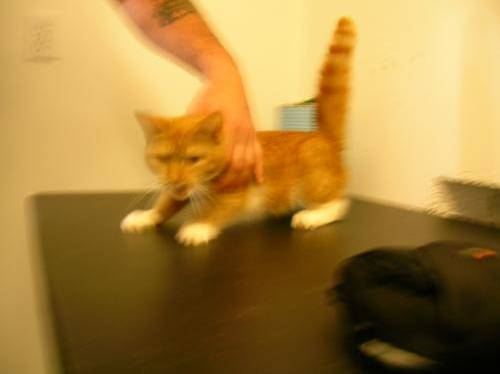

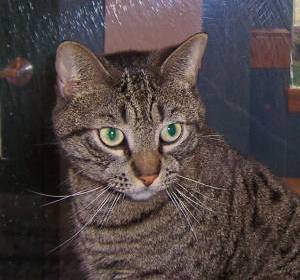

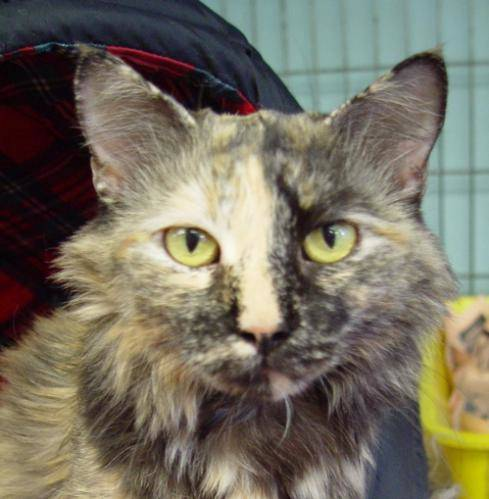

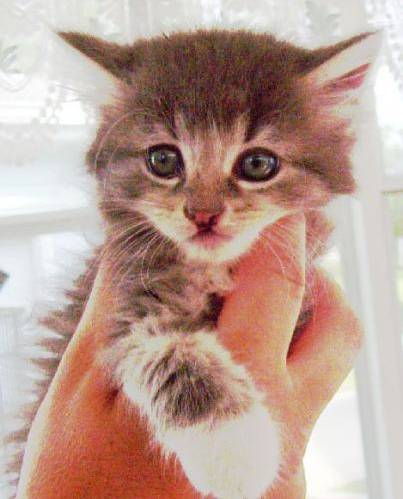

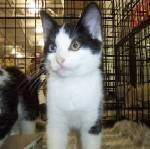

In [5]:
from IPython.display import Image

first_five_cat_images = train_images_name_label_df["filename"][:5]

for n in first_five_cat_images:
    display(Image(filename = f"./catdog_data/train/train/{n}"))

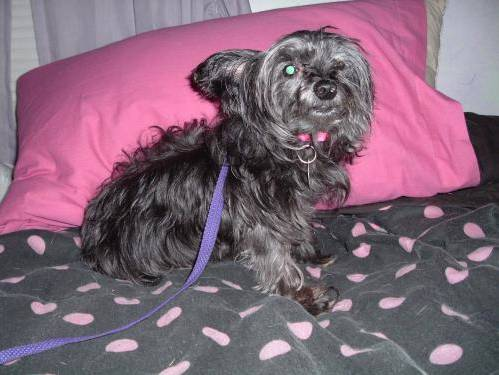

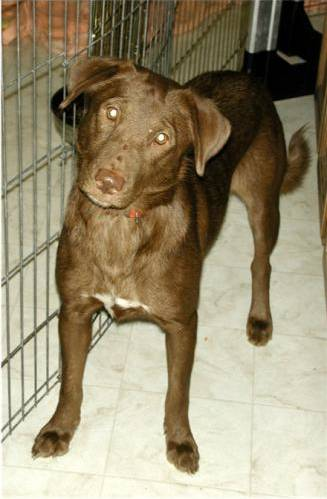

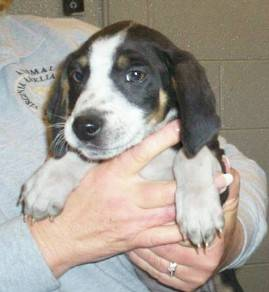

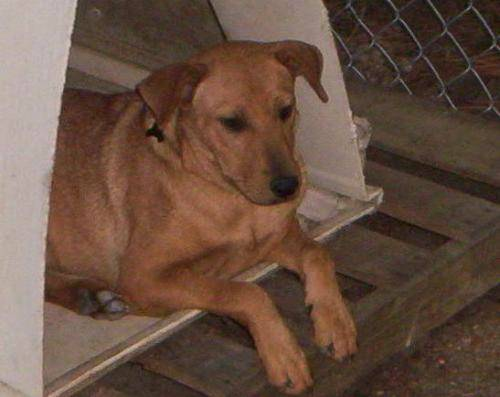

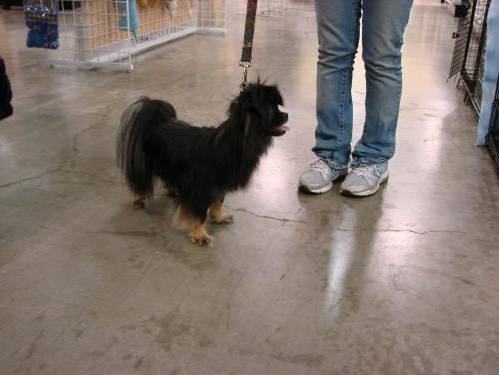

In [6]:
first_five_dog_images = train_images_name_label_df[train_images_name_label_df["label"] == 1]["filename"][:5]

for n in first_five_dog_images:
    display(Image(filename = f"./catdog_data/train/train/{n}"))

In [7]:
# NOTE: Wanted to use ImageDataGenerator, however it has been deprecated according to Tensorflow documentation. 

# # Prepare train/validation dataset
# train_image_generator = ImageDataGenerator(rescale = 1/255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_image_generator = ImageDataGenerator(rescale = 1/255)

# train_set = train_image_generator.flow_from_directory()

In [12]:
# Load images
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150
BATCH_SIZE = 32
SEED = 42

train_dataset, val_dataset = image_dataset_from_directory(
    directory = "catdog_data/train",
    labels = labels, 
    validation_split = 0.2, 
    subset = "both", 
    seed = SEED, 
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE
    )

# test_dataset = image_dataset_from_directory(
#     directory = "./catdog_data/test/test", 
#     image_size = (IMAGE_HEIGHT, IMAGE_WIDTH), 
#     batch_size = BATCH_SIZE,
#     shuffle = False)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [ ]:
# Define data augmentation for train images
train_augmentation = tf.keras.Sequential([
    RandomFlip(seed = SEED),
    RandomRotation(0.2, seed = SEED),
    RandomZoom(0.2, seed = SEED)
])

# Normalization/scaling layer for images
normalization_layer = Rescaling(1./255)

In [ ]:
# Define model